In [1]:
import h5py
f = h5py.File("/Project0551/jingyi/deepgtt/data/trainpath/150105.h5", 'r')
print(list(f.keys()))
dset = f['1']

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '8', '9']


In [2]:
dset.shape

AttributeError: 'Group' object has no attribute 'shape'

In [4]:
dset.keys()


<KeysViewHDF5 ['S', 'dest', 'distance', 'ntrips', 'orig', 'ratio', 'time', 'trip']>

In [5]:
dist = dset['distance']

In [6]:
dist


<HDF5 group "/1/distance" (1753 members)>

In [7]:
dist.keys()

<KeysViewHDF5 ['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1108', '1109', '111', '111

In [8]:
import torch

In [9]:
a = torch.tensor([[[1, 4], [7, 10]], [[2, 5], [8, 11]], [[3, 6], [9, 12]]])

In [10]:
a.shape

torch.Size([3, 2, 2])

In [11]:
a = a.permute(1, 2, 0)

In [12]:
a

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

In [13]:
a.shape

torch.Size([2, 2, 3])

In [14]:
a_flatten = torch.flatten(a, end_dim=1)

In [24]:
a_flatten

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [33]:
a_stack = torch.stack([a_flatten[0], a_flatten[1]], 0)

In [34]:
a_flatten.shape

torch.Size([4, 3])

In [35]:
a_stack.shape

torch.Size([2, 3])

In [36]:
b = torch.ones(2, 4, 3)

In [37]:
a_expand = torch.unsqueeze(a_stack, 1).expand(-1, b.size(1), -1)

In [38]:
a_stack

tensor([[1, 2, 3],
        [4, 5, 6]])

In [39]:
a_expand

tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]])

In [50]:
print(1)

1


In [36]:
import h5py
import numpy as np
with h5py.File("../julia/test_matrix.h5") as f:
    print(np.array(f["tmap"]))
    S = np.rot90(f["tmap"]).copy()
    S = np.transpose(f["tmap"]).copy()
print(S)
print(S[0][0], S[0][1], S[1][0], S[1][1])

[[1. 3.]
 [2. 4.]]
[[1. 2.]
 [3. 4.]]
1.0 2.0 3.0 4.0


/home/jingyi/fyp/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
with h5py.File("/Project0551/jingyi/deepgtt/data/trainpath-fmm-spatial/150103.h5") as f:
        S = np.transpose(f["/1/S"]).copy()

/home/jingyi/fyp/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [38]:
S.shape

(138, 148)

In [39]:
print('percentage of zero entry in current: ', np.count_nonzero((S==0)) / (138*148))

percentage of zero entry in current:  0.6660791226008618


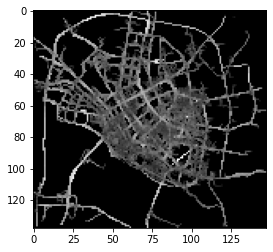

In [40]:
plt.imshow(S, cmap='gray')

In [41]:
print(np.min(S))
print(np.max(S))

0.0
34.853214


In [42]:
print(np.mean(S))

4.637991


In [43]:
from scipy import signal
def feature_completion_spatial(fmap):
#     print("number of non-empty features before completion: " + str(np.count_nonzero((fmap==0)) / (138*148)))
    result = np.copy(fmap)
    conv = np.ones((3,3))
    conv_map = signal.convolve2d(fmap, conv, boundary='symm', mode='same')
    conv_bitmap = signal.convolve2d(fmap!=0, conv, boundary='symm', mode='same')
    result_smooth = conv_map / conv_bitmap
    result[np.logical_and((result==0), (conv_bitmap!=0))] = result_smooth[np.logical_and((result==0), (conv_bitmap!=0))]
#     print("number of empty features after completion: " + str(np.count_nonzero((result==0)) / (138*148)))
    return result

for i in range(10):
    print('percentage of zero entry in current: ', np.count_nonzero((S==0)) / (138*148))
    S = feature_completion_spatial(S)

percentage of zero entry in current:  0.6660791226008618
percentage of zero entry in current:  0.4551018409714062
percentage of zero entry in current:  0.33039561300430864
percentage of zero entry in current:  0.24339012925969447
percentage of zero entry in current:  0.17929886408147278
percentage of zero entry in current:  0.13386212299255779
percentage of zero entry in current:  0.10007833920877399
percentage of zero entry in current:  0.07422640031335684
percentage of zero entry in current:  0.05518018018018018
percentage of zero entry in current:  0.04058950254602429


/home/jingyi/fyp/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


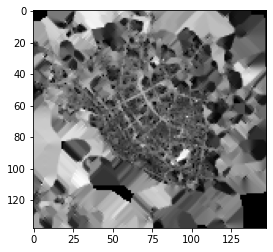

In [44]:
plt.imshow(S, cmap='gray')